### PROJECT DESCRIPTION

This project is for an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this project is to develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help this telecom company to better serve their customers by understanding which customers are at risk of leaving

This solution will help this telecom company to better serve its customers by understanding which customers are at risk of leaving

### HYPOTHESIS FORMULATION

### GUIDING QUESTIONS

### IMPORT PACKAGES

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

# Import pandas and numpy
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.style.use("fivethirtyeight")

# Import machine learning models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import Pipeline, Scaler,Sampler, train_test_split, imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN 

# Import Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# import metrics
from sklearn.metrics import recall_score, mean_squared_log_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

import os, pickle, joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', message='The default value of numeric_only in DataFrame.corr is deprecated')



<Figure size 1000x400 with 0 Axes>

In [2]:
#import data

train = pd.read_csv("C:\\Users\\elvis_d\DATA_ANALYTICS\\DATA_ANALYTICS_TRAINING\\PROJECT_PHASE\\Capstone Project\\datasets and notebooks\\Train.csv")
test = pd.read_csv("C:\\Users\\elvis_d\DATA_ANALYTICS\\DATA_ANALYTICS_TRAINING\\PROJECT_PHASE\\Capstone Project\\datasets and notebooks\\Test.csv")

### EXPLORATORY DATA ANALYSIS

In [16]:
# check samples of train data

pd.options.display.max_columns = None
train.sample(5, random_state=1)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
711285,abd7d23840b364fbb894cbe4d61770f1d3f040a6,THIES,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,17,NaN,NaN,0
997846,62f40514bc6aa3ab17c23826a4f3a2f7803cbfd0,NaN,K > 24 month,1500.0,8.0,1500.0,500.0,8.0,331.0,129.0,13.0,14.0,NaN,NaN,NO,14,On net 200F=Unlimited _call24H,2.0,1
873285,b55cb83b75d434356a763372b4c97fed7dbd12cf,TAMBACOUNDA,K > 24 month,7100.0,22.0,7605.0,2535.0,28.0,NaN,831.0,241.0,2.0,NaN,NaN,NO,43,On net 200F=Unlimited _call24H,19.0,0
945973,30e3ea3226549dfe5523fa86551d4fe7da81fded,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,36,NaN,NaN,0
1063939,6c26d321fb2373c47765b36284d11f7e90339890,MATAM,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,0


In [17]:
# Check shape of train data

print(f"train dataframe shape: {train.shape}")

train dataframe shape: (1077024, 19)


In [6]:
# Check the basic info in the train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [18]:
# Check for null values in the train data

train.isnull().sum()

user_id                 0
REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

There are occurrences of null values in the train data

In [19]:
# Check for duplicated values

train.duplicated().any()

False

There are no duplicated values in the train data

In [20]:
# Check sample of test data

test.sample(5, random_state=1)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
62537,d3ec96b1f11e9a4a788bd458a96b58182bb8d5c6,DAKAR,K > 24 month,4500.0,5.0,4133.0,1378.0,13.0,7169.0,NaN,4.0,1.0,NaN,NaN,NO,62,"Data:1000F=2GB,30d",3.0
132297,33cdd4f7286913d3e4268ecd28c94f5beeebdb87,THIES,K > 24 month,6000.0,12.0,7034.0,2345.0,18.0,NaN,140.0,101.0,42.0,2.0,NaN,NO,60,All-net 500F=2000F;5d,11.0
38461,4281a1d45f12aa2581da28b16d33ab341ed1a694,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN
144589,1553a465555eeda18b103ccc06a57fa507dc0cc3,DAKAR,I 18-21 month,500.0,1.0,500.0,167.0,1.0,NaN,18.0,12.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,1.0
179963,cfdc33ebf6b0f6e815467bbd8c1957dd8471b8d9,DAKAR,K > 24 month,19400.0,23.0,19598.0,6533.0,27.0,8040.0,2.0,2.0,NaN,NaN,49.0,NO,34,"Data: 200 F=100MB,24H",9.0


In [21]:
# Check shape of test data

print(f"train dataframe shape: {test.shape}")

train dataframe shape: (190063, 18)


In [22]:
# Check basic info of test data

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [23]:
# Check for null values in the test data

test.isnull().sum()

user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290
dtype: int64

There are null values in the test data

In [24]:
# Check for duplicates in test data

train.duplicated().any()

False

There are no duplicates in the test data

In [19]:
#Check summary of numerical fields

train.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


### Univariate Analysis

DAKAR          256259
THIES           90171
SAINT-LOUIS     59895
LOUGA           49679
KAOLACK         48498
DIOURBEL        33564
TAMBACOUNDA     27562
KAFFRINE        22067
KOLDA           19464
FATICK          17775
MATAM           14650
ZIGUINCHOR      11036
SEDHIOU          1553
KEDOUGOU          514
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

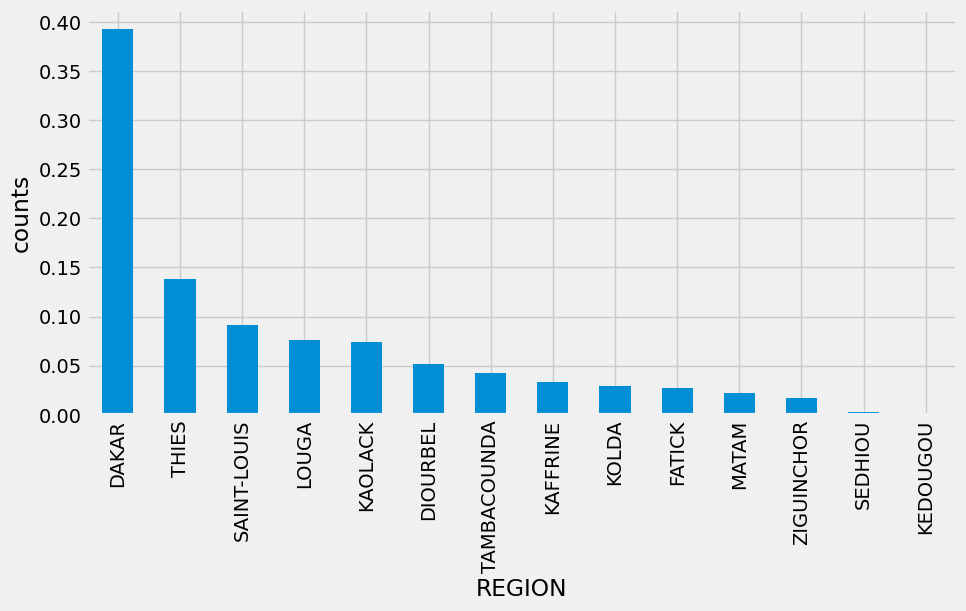

In [7]:
# Check  value counts of region

print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

#### Note
The top five cities with the highest concentration of customers were ;

DAKAR       -    256259<br />
THIES       -    90171<br />
SAINT LOUIS -    59895<br />
LOUGA       -   49679<br />
KAOLACK     -   48498<br />

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

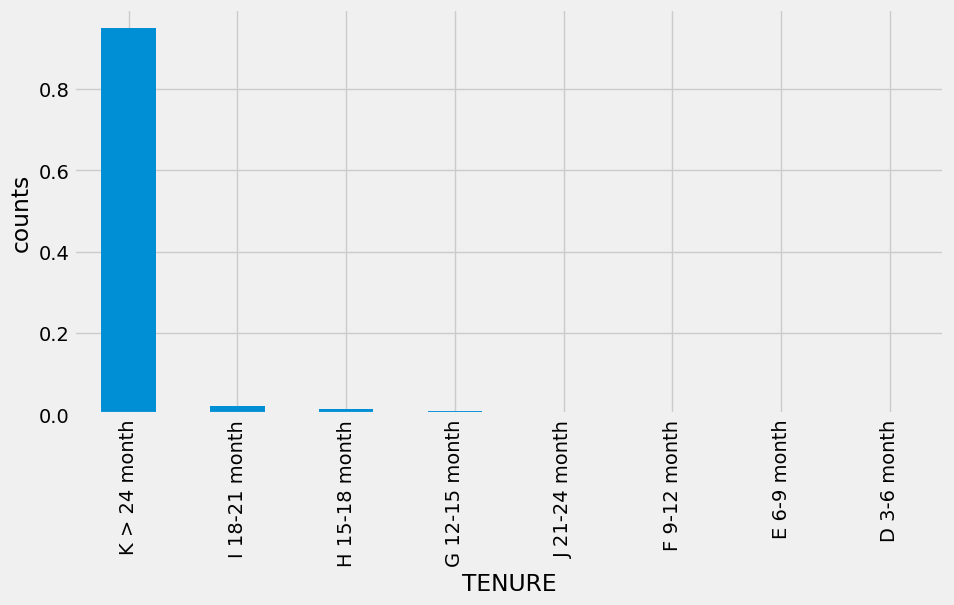

In [8]:
# Check the value count of TENURE

print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    1077024
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

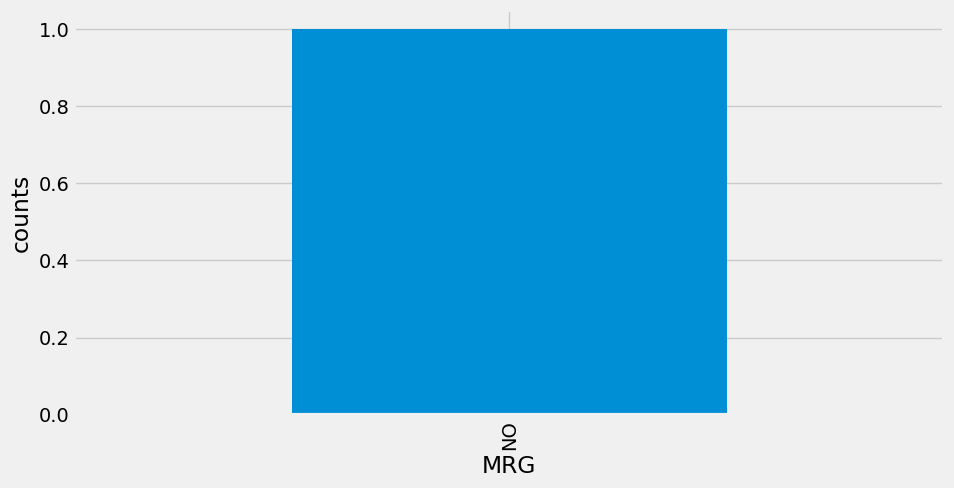

In [9]:
# Check the value count MRG

print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

The top 20 Top Pack packages are :
All-net 500F=2000F;5d                        158779
On net 200F=Unlimited _call24H                76302
Data:490F=1GB,7d                              57679
Data: 100 F=40MB,24H                          42515
Mixt 250F=Unlimited_call24H                   33620
MIXT:500F= 2500F on net _2500F off net;2d     32164
Data:1000F=2GB,30d                            29982
All-net 500F =2000F_AllNet_Unlimited          23476
Jokko_Daily                                   22548
Data: 200 F=100MB,24H                         21515
IVR Echat_Daily_50F                           14316
On-net 500=4000,10d                           13371
On-net 500F_FNF;3d                            11089
Data:200F=Unlimited,24H                       10986
MIXT: 200mnoff net _unl on net _5Go;30d        9612
On-net 1000F=10MilF;10d                        9302
Data:1000F=5GB,7d                              7470
VAS(IVR_Radio_Daily)                           7376
Twter_U2opia_Daily           

Text(0.5, 0, 'TOP_PACK')

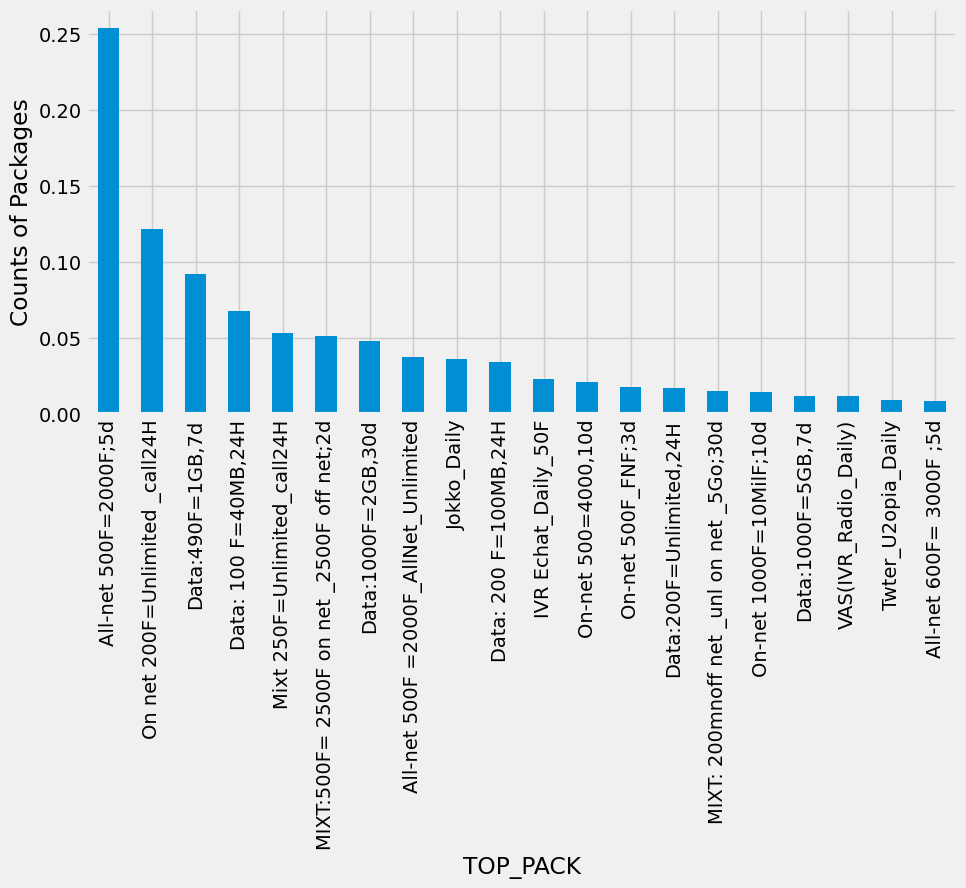

In [18]:
# Check the top 20 most active packs (TOP_PACK)

print("The top 20 Top Pack packages are :") 
print(train['TOP_PACK'].value_counts().head(20))
plt.figure(figsize=(10,5))

top_pack = train['TOP_PACK'].value_counts(normalize=True).head(20)
top_pack.plot(kind='bar')
plt.ylabel('Counts of Packages')
plt.xlabel('TOP_PACK')

0    875031
1    201993
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

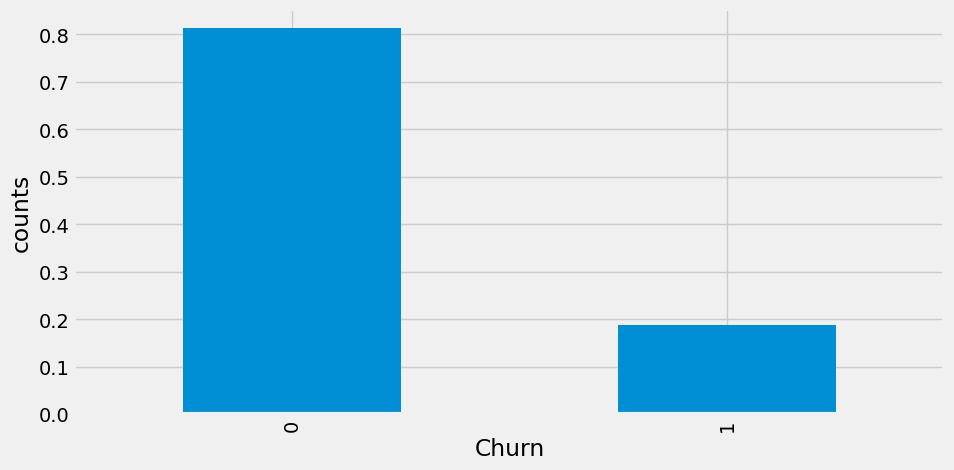

In [5]:
#Check if the predictor class is balanced 

print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [22]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [23]:
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [24]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,62,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,61,7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,56,11.0,0


In [25]:
test.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True)

In [26]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,35,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,22,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,60,4.0


In [27]:
#Fill NAs for train data

In [28]:
train['MONTANT'].fillna((train['MONTANT'].mean()), inplace=True)
train['FREQUENCE_RECH'].fillna((train['FREQUENCE_RECH'].mean()), inplace=True)
train['REVENUE'].fillna((train['REVENUE'].mean()), inplace=True)
train['ARPU_SEGMENT'].fillna((train['ARPU_SEGMENT'].mean()), inplace=True)
train['FREQUENCE'].fillna((train['FREQUENCE'].mean()), inplace=True)
train['DATA_VOLUME'].fillna((train['DATA_VOLUME'].mean()), inplace=True)
train['ON_NET'].fillna((train['ON_NET'].mean()), inplace=True)
train['ORANGE'].fillna((train['ORANGE'].mean()), inplace=True)
train['TIGO'].fillna((train['TIGO'].mean()), inplace=True)
train['ZONE1'].fillna((train['ZONE1'].mean()), inplace=True)
train['ZONE2'].fillna((train['ZONE2'].mean()), inplace=True)
train['FREQ_TOP_PACK'].fillna((train['FREQ_TOP_PACK'].mean()), inplace=True)

In [29]:
train.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.000000,8.167483,7.709844,62,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,3,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,23.105018,8.167483,7.709844,1,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.000000,8.167483,2.000000,61,7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.000000,8.167483,7.709844,56,11.000000,0


In [30]:
train.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [31]:
#Fill NAs for test data

In [32]:
test['MONTANT'].fillna((test['MONTANT'].mean()), inplace=True)
test['FREQUENCE_RECH'].fillna((test['FREQUENCE_RECH'].mean()), inplace=True)
test['REVENUE'].fillna((test['REVENUE'].mean()), inplace=True)
test['ARPU_SEGMENT'].fillna((test['ARPU_SEGMENT'].mean()), inplace=True)
test['FREQUENCE'].fillna((test['FREQUENCE'].mean()), inplace=True)
test['DATA_VOLUME'].fillna((test['DATA_VOLUME'].mean()), inplace=True)
test['ON_NET'].fillna((test['ON_NET'].mean()), inplace=True)
test['ORANGE'].fillna((test['ORANGE'].mean()), inplace=True)
test['TIGO'].fillna((test['TIGO'].mean()), inplace=True)
test['ZONE1'].fillna((test['ZONE1'].mean()), inplace=True)
test['ZONE2'].fillna((test['ZONE2'].mean()), inplace=True)
test['FREQ_TOP_PACK'].fillna((test['FREQ_TOP_PACK'].mean()), inplace=True)

In [33]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,22.95227,8.135421,7.696944,35,5.000000
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,2,9.234326
2,5a4db591c953a8d8f373877fad37aaf4268899a1,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22.95227,8.135421,7.696944,22,9.234326
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,K > 24 month,5506.547759,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,22.95227,8.135421,7.696944,6,9.234326
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,0.00000,0.000000,7.696944,60,4.000000


In [34]:
test.isnull().sum()

user_id           0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

### Feature Creation 


In [35]:

# Assuming you have already loaded train and test DataFrames

# Interaction feature: Multiply MONTANT and FREQUENCE_RECH
train["TOTAL_RECHARGE"] = train["MONTANT"] * train["FREQUENCE_RECH"]
test["TOTAL_RECHARGE"] = test["MONTANT"] * test["FREQUENCE_RECH"]

# Aggregated feature: Calculate the mean of REVENUE and MONTANT
train["AVG_REVENUE_MONTANT"] = (train["REVENUE"] + train["MONTANT"]) / 2
test["AVG_REVENUE_MONTANT"] = (test["REVENUE"] + test["MONTANT"]) / 2

# Polynomial feature: Create squared values for FREQUENCE
train["FREQUENCE_SQUARED"] = train["FREQUENCE"] ** 2
test["FREQUENCE_SQUARED"] = test["FREQUENCE"] ** 2

# Domain-specific feature: Calculate ON_NET to REGULARITY ratio
train["ON_NET_REG_RATIO"] = train["ON_NET"] / train["REGULARITY"]
test["ON_NET_REG_RATIO"] = test["ON_NET"] / test["REGULARITY"]

# Display the first few rows of the modified train and test DataFrames
print(train.head())
print(test.head())


                                    user_id        TENURE       MONTANT  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1  K > 24 month  20000.000000   
1  50443f42bdc92b10388fc56e520e4421a5fa655c  K > 24 month   5529.210895   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2  K > 24 month   5529.210895   
3  364ec1b424cdc64c25441a444a16930289a0051e  K > 24 month   7900.000000   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb  K > 24 month  12350.000000   

   FREQUENCE_RECH       REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0       47.000000  21602.000000   7201.000000  52.000000  8835.000000   
1       11.523756   5506.050798   1835.355961  13.974439  3368.801722   
2       11.523756   5506.050798   1835.355961  13.974439  3368.801722   
3       19.000000   7896.000000   2632.000000  25.000000  9385.000000   
4       21.000000  12351.000000   4117.000000  29.000000  9360.000000   

        ON_NET      ORANGE        TIGO     ZONE1     ZONE2  REGULARITY  \
0  3391.000000  396.000000  185.0000

## Machine Learning

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [37]:
dropcols = ['user_id', 'CHURN']
y = train['CHURN']
x = train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
print(test.shape)

(1077024, 18)
(1077024,)
(190063, 18)


In [38]:
#Split training data into train and test split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(538512, 18)
(538512,)
(538512, 18)
(538512,)


In [40]:
#Further split X_train and y_train into train and validation sets

In [41]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.3, random_state=1)

In [42]:
print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(376958, 18)
(376958,)
+++++++
test
(538512, 18)
(538512,)
+++++++
validation
(161554, 18)
(161554,)


In [43]:
#Standardize numeric columns

In [44]:
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK']

In [45]:
scaler = StandardScaler()

In [46]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [47]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
799472,K > 24 month,1.022970,0.889686,1.127881,1.127710,1.927184,0.389218,-0.317321,-0.290984,-0.510194,-0.000005,0.723281,1.478598,-0.348810,239400.0,11751.5,1369.0,0.934426
295570,J 21-24 month,0.203177,0.139290,0.353855,0.353853,0.588023,0.875619,-0.393770,-0.541835,-0.586660,-0.000005,-0.230646,1.209397,-0.027868,87100.0,7139.0,441.0,0.072727
929179,K > 24 month,0.473534,0.795886,0.460594,0.460592,0.839115,-0.337908,-0.074993,1.555015,2.930798,-0.000005,0.002364,1.523465,0.079113,165000.0,8226.0,576.0,3.629032
787349,K > 24 month,-0.878252,-0.986303,-0.856875,-0.856709,-1.085930,-0.001634,-0.338958,-0.535403,0.002260,-0.000005,0.002364,1.074797,-0.883713,500.0,500.0,1.0,0.807692
965538,K > 24 month,-0.948021,-0.986303,-0.928206,-0.928039,-1.085930,-0.309351,-0.388000,-0.612587,0.002260,-0.000005,0.002364,-0.944210,-0.883713,100.0,91.5,1.0,1.142857


In [48]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [49]:
X_test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
711285,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.348940,0.000108,-0.000508,0.002260,-0.000005,0.002364,-0.495542,0.000209,63717.275282,5517.630847,195.284932,16.297988
997846,K > 24 month,-0.703828,-0.329707,-0.685820,-0.685824,-5.000463e-01,-0.314815,-0.213467,-0.528970,-0.229817,-0.000005,0.002364,-0.630142,-0.776733,12000.000000,1500.000000,64.000000,9.214286
873285,K > 24 month,0.272946,0.983485,0.358473,0.358471,1.173906e+00,-0.001634,0.799118,0.937538,-0.535682,-0.000005,0.002364,0.670995,1.041940,156200.000000,7352.500000,784.000000,19.325581
945973,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.348940,0.000108,-0.000508,0.002260,-0.000005,0.002364,0.356928,0.000209,63717.275282,5517.630847,195.284932,7.696272
1063939,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-0.944210,0.000209,63717.275282,5517.630847,195.284932,39.580828


In [50]:
test[num_cols] = scaler.transform(test[num_cols])

In [51]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
0,I 18-21 month,-0.529404,-0.611105,-0.514765,-0.514940,-0.751139,-0.348940,-0.307224,-0.162343,-0.001634,-0.002870,0.000606,0.312061,-0.455791,12500.000000,2500.000000,25.000000,1.828571
1,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-1.168544,-0.002799,63236.865923,5496.390588,194.314408,140.605307
2,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.348940,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.271208,-0.002799,63236.865923,5496.390588,194.314408,12.782301
3,K > 24 month,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.989077,-0.002799,63236.865923,5496.390588,194.314408,46.868436
4,K > 24 month,-0.075902,-0.423506,0.021836,0.021834,0.085837,0.453446,-0.356267,-0.458218,-0.586660,-0.729836,0.000606,1.433731,-0.562771,35700.000000,5368.500000,225.000000,0.500000


In [52]:
X_val[num_cols] = scaler.transform(X_val[num_cols])

In [53]:
X_val.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
917325,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-1.213411,0.000209,63717.275282,5517.630847,195.284932,277.065798
694916,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-0.809609,-0.883713,63717.275282,5517.630847,195.284932,27.706580
1023253,K > 24 month,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.00226,-0.000005,0.002364,-1.213411,0.000209,63717.275282,5517.630847,195.284932,277.065798
584285,K > 24 month,-0.703828,-0.611105,-0.685991,-0.685824,-6.674415e-01,-0.347805,-0.383673,-0.368169,0.00226,-0.000005,0.002364,-0.630142,-0.776733,7500.000000,1499.500000,36.000000,0.785714
446284,K > 24 month,0.464813,1.264883,0.499423,0.499592,1.090208e+00,-0.348940,1.100586,0.204284,0.00226,-0.000005,0.002364,1.523465,-0.134848,205000.000000,8314.500000,729.000000,16.774194


In [54]:
#Encode the TENURE column

In [55]:
encoder = LabelEncoder()
X_train["TENURE"] = encoder.fit_transform(X_train["TENURE"])

In [56]:
X_test["TENURE"] = encoder.transform(X_test["TENURE"])

In [57]:
X_val['TENURE'] = encoder.transform(X_val["TENURE"])

In [58]:
test['TENURE'] = encoder.transform(test["TENURE"])

### Question 2 Balancing the Dataset

In [59]:
# Display the class distribution before balancing
print("Class distribution before balancing:")
print(y_train.value_counts())


Class distribution before balancing:
0    306308
1     70650
Name: CHURN, dtype: int64


In [60]:
# Create an oversampler
oversampler = RandomOverSampler(sampling_strategy='auto')

# Apply the oversampling
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Create a new balanced DataFrame
balanced_X_train = pd.DataFrame(X_resampled, columns=X_train.columns)
balanced_y_train = pd.Series(y_resampled, name='CHURN')

# Display the class distribution after balancing
print("\nClass distribution after balancing:")
print(balanced_y_train.value_counts())


Class distribution after balancing:
0    306308
1    306308
Name: CHURN, dtype: int64


In [61]:
X_train =balanced_X_train
X_train

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
0,7,1.022970,0.889686,1.127881,1.127710,1.927184e+00,0.389218,-0.317321,-0.290984,-0.510194,-0.000005,0.723281,1.478598,-0.348810,239400.000000,11751.500000,1369.000000,0.934426
1,6,0.203177,0.139290,0.353855,0.353853,5.880227e-01,0.875619,-0.393770,-0.541835,-0.586660,-0.000005,-0.230646,1.209397,-0.027868,87100.000000,7139.000000,441.000000,0.072727
2,7,0.473534,0.795886,0.460594,0.460592,8.391155e-01,-0.337908,-0.074993,1.555015,2.930798,-0.000005,0.002364,1.523465,0.079113,165000.000000,8226.000000,576.000000,3.629032
3,7,-0.878252,-0.986303,-0.856875,-0.856709,-1.085930e+00,-0.001634,-0.338958,-0.535403,0.002260,-0.000005,0.002364,1.074797,-0.883713,500.000000,500.000000,1.000000,0.807692
4,7,-0.948021,-0.986303,-0.928206,-0.928039,-1.085930e+00,-0.309351,-0.388000,-0.612587,0.002260,-0.000005,0.002364,-0.944210,-0.883713,100.000000,91.500000,1.000000,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612611,7,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-1.213411,0.000209,63717.275282,5517.630847,195.284932,277.065798
612612,7,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-1.168544,0.000209,63717.275282,5517.630847,195.284932,138.532899
612613,7,-0.001037,0.000819,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-1.123677,0.000209,63717.275282,5517.630847,195.284932,92.355266
612614,4,-0.878252,-0.986303,-0.000563,-0.000563,-3.557674e-08,-0.001634,0.000108,-0.000508,0.002260,-0.000005,0.002364,-1.213411,0.000209,500.000000,3003.025399,195.284932,277.065798


In [62]:
y_train = balanced_y_train
y_train

0         0
1         0
2         0
3         0
4         0
         ..
612611    1
612612    1
612613    1
612614    1
612615    1
Name: CHURN, Length: 612616, dtype: int64

In [63]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
0,7,1.022970,0.889686,1.127881,1.127710,1.927184,0.389218,-0.317321,-0.290984,-0.510194,-0.000005,0.723281,1.478598,-0.348810,239400.0,11751.5,1369.0,0.934426
1,6,0.203177,0.139290,0.353855,0.353853,0.588023,0.875619,-0.393770,-0.541835,-0.586660,-0.000005,-0.230646,1.209397,-0.027868,87100.0,7139.0,441.0,0.072727
2,7,0.473534,0.795886,0.460594,0.460592,0.839115,-0.337908,-0.074993,1.555015,2.930798,-0.000005,0.002364,1.523465,0.079113,165000.0,8226.0,576.0,3.629032
3,7,-0.878252,-0.986303,-0.856875,-0.856709,-1.085930,-0.001634,-0.338958,-0.535403,0.002260,-0.000005,0.002364,1.074797,-0.883713,500.0,500.0,1.0,0.807692
4,7,-0.948021,-0.986303,-0.928206,-0.928039,-1.085930,-0.309351,-0.388000,-0.612587,0.002260,-0.000005,0.002364,-0.944210,-0.883713,100.0,91.5,1.0,1.142857


In [64]:
##RandomForestClassifier Model

In [65]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                             verbose=True)

In [66]:
#Fit model on data
randmodel = rand.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


In [67]:
#Predict on the X_test data 
randpred = randmodel.predict(X_test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    4.0s finished


In [68]:
print("Acuracy")
accuracy_score(y_test, randpred)


Acuracy


0.8087043557060938

In [69]:
print("Recall")
recall_score(y_test, randpred)

Recall


0.8539799839950998

In [70]:
print("F1 Score")
f1_score(y_test, randpred)

F1 Score


0.6266124910744383

In [71]:
# Calculate and print the Area Under the ROC Curve (AUC)
auc = roc_auc_score(y_test, randpred)
print("AUC:", auc)

AUC: 0.8261022576866874


In [72]:
confusion_matrix(y_test, randpred)

array([[349058,  88235],
       [ 14780,  86439]], dtype=int64)

In [73]:
# Making a submissio

In [74]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [75]:
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,TOTAL_RECHARGE,AVG_REVENUE_MONTANT,FREQUENCE_SQUARED,ON_NET_REG_RATIO
0,5,-0.529404,-0.611105,-0.514765,-0.514940,-0.751139,-0.348940,-0.307224,-0.162343,-0.001634,-0.002870,0.000606,0.312061,-0.455791,12500.000000,2500.000000,25.000000,1.828571
1,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-1.168544,-0.002799,63236.865923,5496.390588,194.314408,140.605307
2,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.348940,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.271208,-0.002799,63236.865923,5496.390588,194.314408,12.782301
3,7,-0.004990,-0.002915,-0.003953,-0.003953,-0.002910,-0.002704,0.006086,-0.004040,-0.001634,-0.002870,0.000606,-0.989077,-0.002799,63236.865923,5496.390588,194.314408,46.868436
4,7,-0.075902,-0.423506,0.021836,0.021834,0.085837,0.453446,-0.356267,-0.458218,-0.586660,-0.729836,0.000606,1.433731,-0.562771,35700.000000,5368.500000,225.000000,0.500000


In [76]:
predictions = randmodel.predict(test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.4s finished


In [77]:
subpred = randmodel.predict(test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.5s finished


In [78]:
subpred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [79]:
submission["CHURN"] = subpred

In [80]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,1
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [81]:
submission.to_csv('starter_code_submission.csv', index=False)

### Using other Algorithims 

Gradient Boosting Classifier model

In [82]:
# Initialize and train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
gb_pred = gb_model.predict(X_test)


In [83]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score

# Calculate evaluation metrics for Gradient Boosting predictions
f1 = f1_score(y_test, gb_pred)
accuracy = accuracy_score(y_test, gb_pred)
conf_matrix = confusion_matrix(y_test, gb_pred)
roc_auc = roc_auc_score(y_test, gb_pred)
# Print the calculated scores
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

F1 Score: 0.6240124299301885
Accuracy: 0.8040767893751671
Confusion Matrix:
 [[345452  91841]
 [ 13666  87553]]
ROC AUC Score: 0.8274820834295887


#### LogisticRegression Model

In [84]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)


LogisticRegression()

In [85]:
# Make predictions
logreg_pred = logreg_model.predict(X_test)

In [86]:
# Calculate evaluation metrics
f1 = f1_score(y_test, logreg_pred)
accuracy = accuracy_score(y_test, logreg_pred)
conf_matrix = confusion_matrix(y_test, logreg_pred)
roc_auc = roc_auc_score(y_test, logreg_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])

# Print evaluation metrics
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC:", roc_auc)

F1 Score: 0.5845878988043042
Accuracy: 0.8117442136851175
Confusion Matrix:
 [[365802  71491]
 [ 29887  71332]]
ROC AUC: 0.77062199865317


####  Gaussian Naive Bayes classifier

In [87]:
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [88]:
# Make predictions
nb_pred = nb_model.predict(X_test)

In [89]:
# Calculate evaluation metrics for Naive Bayes predictions
f1 = f1_score(y_test, nb_pred)
accuracy = accuracy_score(y_test, nb_pred)
conf_matrix = confusion_matrix(y_test, nb_pred)
roc_auc = roc_auc_score(y_test, nb_pred)

# Print evaluation metrics
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC:", roc_auc)

F1 Score: 0.36546933088051087
Accuracy: 0.35564109991977894
Confusion Matrix:
 [[ 91588 345705]
 [  1290  99929]]
ROC AUC: 0.5983492268504363


#### K-Nearest Neighbors (KNN) Classifier

In [90]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [91]:
knn_pred = knn_model.predict(X_test)

In [92]:
f1 = f1_score(y_test, knn_pred)
accuracy = accuracy_score(y_test, knn_pred)
conf_matrix = confusion_matrix(y_test, knn_pred)
roc_auc = roc_auc_score(y_test, knn_pred)

print("K-Nearest Neighbors (KNN) Classifier:")
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC:", roc_auc)

K-Nearest Neighbors (KNN) Classifier:
F1 Score: 0.5147304456077345
Accuracy: 0.7987658585138308
Confusion Matrix:
 [[372672  64621]
 [ 43746  57473]]
ROC AUC: 0.7100166769220442


### Comparing the Results 


In [93]:
# Define your evaluation results
results = [
    {"Model": "Random Forest", "F1 Score": 0.6236817675785071, "Accuracy": 0.8035271266007071, "ROC AUC": 0.8276067966617611},
    {"Model": "Gradient Boosting", "F1 Score": 0.6261220373171962, "Accuracy": 0.8485567638232759, "ROC AUC": 0.7817325245750717},
    {"Model": "Logistic Regression", "F1 Score": 0.36647815400768363, "Accuracy": 0.359091348010815, "ROC AUC": 0.6000864292207999},
    {"Model": "Gaussian Naive Bayes", "F1 Score": 0.36647815400768363, "Accuracy": 0.359091348010815,  "ROC AUC": 0.6000864292207999},
    {"Model": "K-Nearest Neighbors", "F1 Score": 0.515288189089344, "Accuracy": 0.7992356716284874, "ROC AUC": 0.7102831783344292}
]

# Create a DataFrame from the results
df = pd.DataFrame(results)
df

,Model,F1 Score,Accuracy,ROC AUC
0,Random Forest,0.623682,0.803527,0.827607
1,Gradient Boosting,0.626122,0.848557,0.781733
2,Logistic Regression,0.366478,0.359091,0.600086
3,Gaussian Naive Bayes,0.366478,0.359091,0.600086
4,K-Nearest Neighbors,0.515288,0.799236,0.710283


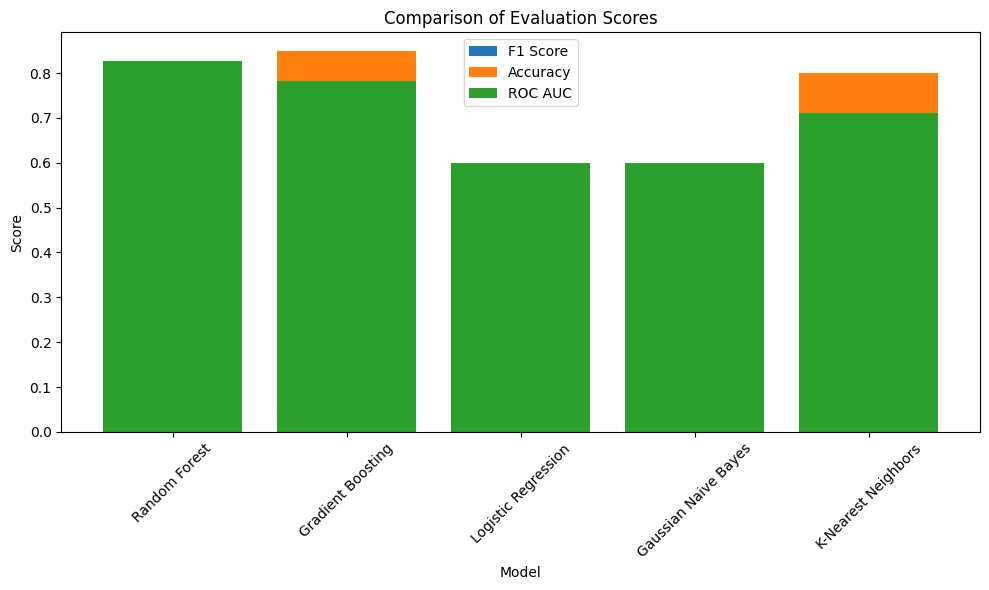

In [94]:
# Plot the evaluation scores
plt.figure(figsize=(10, 6))

# Plotting
plt.bar(df["Model"], df["F1 Score"], label="F1 Score")
plt.bar(df["Model"], df["Accuracy"], label="Accuracy")
plt.bar(df["Model"], df["ROC AUC"], label="ROC AUC")


plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Evaluation Scores")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### checking for the best Model 

In [95]:
# Determine the best model based on your criteria (e.g., highest F1 Score)
best_model = df[df["F1 Score"] == df["F1 Score"].max()]["Model"].iloc[0]
print("Best Model:", best_model)


Best Model: Gradient Boosting


### Hyperparameter tunning for the best model

In [96]:
# Define the reduced hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3]
}


In [97]:
# Create a Gradient Boosting classifier instance
gb_classifier = GradientBoostingClassifier()


In [98]:
# Create GridSearchCV instance with cross-validation
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='f1', verbose=1)


In [99]:
# Fit the GridSearchCV on your training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 4],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [102]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


In [103]:
# Print the best parameters
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [104]:
# Train and evaluate the best model with the tuned parameters
best_estimator.fit(X_train, y_train)
best_pred = best_estimator.predict(X_test)

In [105]:
# Calculate and print evaluation metrics for the best model
best_f1 = f1_score(y_test, best_pred)
best_accuracy = accuracy_score(y_test, best_pred)
best_precision = precision_score(y_test, best_pred)
best_conf_matrix = confusion_matrix(y_test, best_pred)
best_roc_auc = roc_auc_score(y_test, best_pred)

# Print the evaluation metrics for the best model after tuning
print("Best Model Evaluation Metrics after Tuning:")
print("F1 Score:", best_f1)
print("Accuracy:", best_accuracy)
print("Precision:", best_precision)
print("Confusion Matrix:\n", best_conf_matrix)
print("ROC AUC Score:", best_roc_auc)

Best Model Evaluation Metrics after Tuning:
F1 Score: 0.6239166509723935
Accuracy: 0.8034639896603976
Precision: 0.48718645948945616
Confusion Matrix:
 [[344884  92409]
 [ 13428  87791]]
ROC AUC Score: 0.8280083018895201


In [107]:
# Create a DataFrame to compare results
results_comparison = pd.DataFrame({
    "Metric": ["F1 Score", "Accuracy", "ROC AUC"],
    "Original Model": [0.6240124299301885, 0.8040767893751671,0.8274820834295887],
    "Tuned Model": [0.6239166509723935, 0.8034639896603976, 0.8280083018895201]
})

# Print the comparison DataFrame
print(results_comparison)

     Metric  Original Model  Tuned Model
0  F1 Score        0.624012     0.623917
1  Accuracy        0.804077     0.803464
2   ROC AUC        0.827482     0.828008


In [109]:
# Save the tuned Gradient Boosting model to my local machine
save_path = r"D:\Projects\Capstone Churn prediction\ML folder\tuned_gb_model.joblib"
joblib.dump(best_estimator, save_path)

['D:\\Projects\\Capstone Churn prediction\\ML folder\\tuned_gb_model.joblib']

In [100]:
submission

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,1
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0
...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,1
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,0


In [101]:
# 1. Do more feature engineering
# 2. Handle the imbalance nature of the predictor class 
# 3. Use other algorithms
# 4. Tune hyperparameters of this model
# 5. Handle missing values properly
# 6. Any other thing you feel can improve the performance of the model is good to go


### Good Luck !!!